## 05-MACAU 

In this notebook I use MACAU - Mixed model Association for Count data via data AUgmentation - to assess the influence of Olympia oyster size/weight on DNA methylation, while controlling for relatedness. I leverage sequence data from bisulfite treated DNA from 2 Olympia oyster populations - Dabob Bay (in Hood Canal), and Oyster Bay (in South Puget Sound). 

MACAU runs on Lenox. The software is available on [Zhou Lab website](http://www.xzlab.org/software.html). The R program seems to have some issues, so I'm using the binary version installed by Sam on Roadrunner. The [MACAU user manual](http://www.xzlab.org/software/macau/MACAUmanual.pdf) is the basis for this analysis. 

### Input files 

MACAU inputs for this type of analysis include: 

(1) Methylated read counts (raw counts, not percentages)
(2) Total read counts (raw counts)
(3) Relatedness matrix
(4) Predictor variable, or covariates 

First, I download all the files I'll need for MACAU. The files were generated as follows: 

Both read count files - (1) and (2) above - were generated by Laura Spencer in RStudio in the [04-raw-count-files.Rmd notebook](https://github.com/sr320/paper-oly-mbdbs-gen/blob/master/code/04-raw-count-files.Rmd), using the MethylKit object that Steven Roberts generated in MethylKit in the [01-methylkit.Rmd notebook](https://github.com/sr320/paper-oly-mbdbs-gen/blob/master/code/01-methylkit.Rmd). Note that in both files, counts from + and - strand were combined.
- [counts-total-destrand.txt](https://github.com/sr320/paper-oly-mbdbs-gen/blob/master/analyses/counts-total-destrand.txt)
- [counts-meth-destrand.txt](https://github.com/sr320/paper-oly-mbdbs-gen/blob/master/analyses/counts-meth-destrand.txt)

The relatedness matrix - (3) - was generated by Katherine Silliman from 2bRad data, using SNPs and the program ANGSD. Check out her notebook entry, [SOS_angsd.ipynb](https://github.com/sr320/paper-oly-mbdbs-gen/blob/master/analyses/2bRAD/SOS_angsd.ipynb). 
- [HSmbdsamples_rab.txt](https://github.com/sr320/paper-oly-mbdbs-gen/blob/master/analyses/2bRAD/HSmbdsamples_rab.txt) - generated using only HC/SS samples  
- [mbdsamples_rab.txt](https://github.com/sr320/paper-oly-mbdbs-gen/blob/master/analyses/2bRAD/mbdsamples_rab.txt) - using all three populations - HC/SS/NF  

The predictor covariates - (4) - is the variable we will use to assess differential DNA methylation. Our data is both shell length and wet weight. 
- [size.macau.txt](https://github.com/sr320/paper-oly-mbdbs-gen/blob/master/data/size.macau.txt)

NOTE: all 4 files need to have samples in the same order. They are all ordered using the mbd seq. sample numbers, 1-18. For the count data files, they automatically were ordered sequentially this way when I generated them. For the size covariate file, I re-orded samples in the [04-raw-count-files.Rmd notebook](https://github.com/sr320/paper-oly-mbdbs-gen/blob/master/code/04-raw-count-files.Rmd).  Katherine re-ordered her relatedness matrix in the [SOS_angsd.ipynb notebook](https://github.com/sr320/paper-oly-mbdbs-gen/blob/master/analyses/2bRAD/SOS_angsd.ipynb). 

Here are screen shots to confirm. 

_Hold for SSs of other dataframes from RStudio_

Katherine's relatedness matrix order 
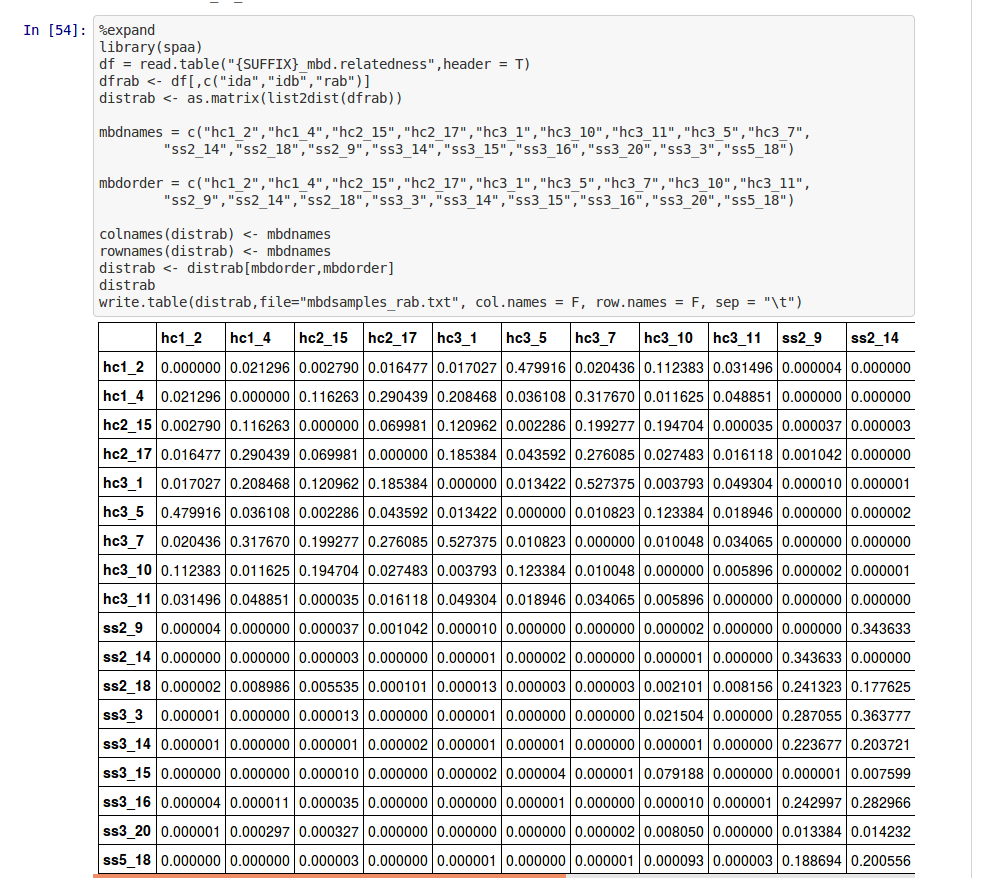

See if we can access MACAU 

In [3]:
! /home/shared/macau/macau -h


 MACAU version 1.00alpha, released on 06/05/2015
 implemented by Xiang Zhou

 type ./macau -h [num] for detailed helps
 options: 
 1: quick guide
 2: file I/O related
 3: fit binomial mixed models
 4: note



In [4]:
! /home/shared/macau/macau -h 1

 QUICK GUIDE
 To fit binomial mixed models: 
         ./macau -r [filename] -t [filename] -p [filename] -k [filename] -bmm -o [prefix]



In [6]:
pwd

u'/home/srlab/laura/paper-oly-mbdbs-gen/code'

In [7]:
# create a macau/ directory  

mkdir ../analyses/macau/

In [8]:
# MACAU writes output files to current directory, so move there 

cd ../analyses/macau/

/home/srlab/laura/paper-oly-mbdbs-gen/analyses/macau


In [14]:
# Confirm which column I want to use as predictor variable. 
#1= covariate file intercept 
#2 - shell length 
#3 - wet weight 

! head ../../data/size.macau.txt

1	2.2	17.41
1	1.9	20.43
1	2.2	25.33
1	1.1	19.38
1	2.2	26.79
1	1.2	19.8
1	2.1	20.54
1	1.9	19.5
1	1.4	18.43
1	2.2	21.02


Use the following options: 
    
-g  specify the methylated read counts file name.  
-t  specify the total read counts file name.  
-p  specify the predictor variable file name.  
-n 2 specify which predictor variable column to use in analysis.  
-k  specify the kinship/relatedness matrix file name.  
-bmm  specifies binomial mixed model.  
-o  specify output file prefix (default “result”).  

Started run at 6:30pm on 08/19/2019 

In [15]:
! /home/shared/macau/macau \
-g ../counts-meth-destrand.txt \
-t ../counts-total-destrand.txt \
-p ../../data/size.macau.txt \
-n 2 \
-k ../2bRAD/HSmbdsamples_rab.txt \
-bmm \
-o 20190809-macau-1

Reading Files ... 
## number of total individuals = 18
## number of analyzed individuals = 18
## number of covariates = 1
## number of total genes/sites = 256043
Performing Analysis ==================================================100.00%


In [16]:
ls

output/


In [17]:
! head output/20190809-macau-1.assoc.txt

id	n	acpt_rate	beta	se_beta	pvalue	h	se_h	sigma2	se_sigma2	alpha0	se_alpha0
Contig038973	18	4.242e-01	1.750e-01	1.630e-01	2.830e-01	7.699e-01	2.271e-01	2.162e+00	5.144e+00	8.820e-01	4.596e-01
Contig039226	18	4.718e-01	-2.333e-01	1.223e-01	5.630e-02	6.862e-01	2.543e-01	8.746e-01	1.886e+00	6.602e-01	3.244e-01
Contig039234	18	4.101e-01	2.218e-02	1.071e-01	8.360e-01	7.027e-01	2.374e-01	1.208e+00	2.645e+00	-6.549e-01	3.421e-01
Contig039252	18	4.079e-01	5.827e-02	1.651e-01	7.241e-01	7.658e-01	2.282e-01	3.523e+00	8.175e+00	6.046e-01	5.219e-01
Contig041234	18	3.508e-01	-1.647e-01	2.877e-01	5.671e-01	5.357e-01	2.596e-01	4.324e+00	8.149e+00	1.555e+00	8.488e-01
Contig064124	18	3.286e-01	-1.808e-01	2.891e-01	5.316e-01	4.727e-01	2.334e-01	4.387e+00	5.146e+00	3.684e-01	7.954e-01
Contig064179	18	2.204e-01	-3.003e-01	2.015e-01	1.362e-01	7.096e-01	2.138e-01	1.542e+01	1.882e+01	2.972e+00	9.741e-01
Contig064210	18	2.682e-01	-9.779e-02	3.154e-01	7.565e-01	7.520e-01	2.010e-01	1.161e+01	1.794e+01	3.230e+00	

In [32]:
# List column names - p-value is 6th column (use for indexing)
! head -n 1 output/20190809-macau-1.assoc.txt

id	n	acpt_rate	beta	se_beta	pvalue	h	se_h	sigma2	se_sigma2	alpha0	se_alpha0


In [33]:
# Count # hits with p-value <0.05
! awk '$6<0.05{pvalue++} END{print pvalue+0}' \
output/20190809-macau-1.assoc.txt

17324


In [34]:
# Count # hits with p-value <0.01
! awk '$6<0.01{pvalue++} END{print pvalue+0}' \
output/20190809-macau-1.assoc.txt

4569


In [36]:
# Count # hits with p-value <0.001
! awk '$6<0.001{pvalue++} END{print pvalue+0}' \
output/20190809-macau-1.assoc.txt

856
